In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data. Visadataset.csv file has 12 cols

path=r"C:\Users\User\OneDrive\Desktop\Omkar sir\DATA files\Visadataset.csv"

In [5]:
visa_df=pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Omkar sir\DATA files\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Bi variate analysis**
- We already seen Uni variate analysis
- We performed the categorical columns analysis:
- Frequency table (Value counts)
- Bar chart


- Relative frequency table (Value counts Normalized form)
- Pie chart
- We performed the numerical column analysis
- Histogram
- Distribution plots
- Box plot
- Outlier analysis
- Filling the outliers

# Now we will do Categorical-Categorical Analaysis
- Numerical - Numerical analayis
- Categorical - Numerical analysis
- Categorical-Categorical

#Lets consider two columns
- Continent
- Case status

In [9]:
# Continent
# Aug7th video second half
# I will cleaen up
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [12]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**
- Find the Certified observations continent wise
- Find the Denied observations continent wise

In [15]:
# Step-1: Make the first condition Continet=='Asia'
# Step-2: Make the second condition case_status=='Certified'
# Step-3: Make the Third condition: con1&con2
# Step-4: Then retrive the dataframe and take the count


con1=visa_df['continent']=='Asia'

con2=visa_df['case_status']=='Certified'

con3=con1&con2

len(visa_df[con3])                                  # this output gives how many are certified from Asia


11012

In [17]:
visa_df['continent'].unique()
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [19]:
visa_df['continent'].unique()
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [23]:
# visa_df['continent'].unique()
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [25]:
# to get 'certified' from all continents , use for loop wnd initialize empty list

continents=visa_df['continent'].unique()

certified_list=[]

for i in continents:
    
 con1=visa_df['continent']==i
    
 con2=visa_df['case_status']=='Certified'
    
 con3=con1&con2
    
 count=len(visa_df[con3])
    
 print(f"the number of certified visa from {i} is: {count}")
    


the number of certified visa from Asia is: 11012
the number of certified visa from Africa is: 397
the number of certified visa from North America is: 2037
the number of certified visa from Europe is: 2957
the number of certified visa from South America is: 493
the number of certified visa from Oceania is: 122


In [31]:
# to get, how many are 'certified' and how many are''denied' from each continent:


continents=visa_df['continent'].unique()

certified_list,denied_list=[],[]

for i in continents:
    
 con1=visa_df['continent']==i
    
 con2=visa_df['case_status']=='Certified'
    
 con3=visa_df['case_status']=='Denied'
    
 cert_con=con1&con2
    
 den_con=con1&con3
    
 cert_count=len(visa_df[cert_con])
    
 den_count=len(visa_df[den_con])
    
 print(f"the number of certified visa from {i} is: {cert_count}")
    
 print(f"the number of Denied visa from {i} is: {den_count}")
    
 print('\n')
    
 certified_list.append(cert_count)
    
 denied_list.append(den_count)
  

the number of certified visa from Asia is: 11012
the number of Denied visa from Asia is: 5849


the number of certified visa from Africa is: 397
the number of Denied visa from Africa is: 154


the number of certified visa from North America is: 2037
the number of Denied visa from North America is: 1255


the number of certified visa from Europe is: 2957
the number of Denied visa from Europe is: 775


the number of certified visa from South America is: 493
the number of Denied visa from South America is: 359


the number of certified visa from Oceania is: 122
the number of Denied visa from Oceania is: 70




In [62]:
# DF...dataframe
# continents
# certified_list

cols=['Continents','Certified']                                 # col headings

df1=pd.DataFrame(zip(continents,certified_list),
 columns=cols)

df1

,Continents,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [43]:
# data frame

cols=['Continents','Denied']                                     # col headings

df2=pd.DataFrame(zip(continents,denied_list),
 columns=cols)

df2

,Continents,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [45]:
# data frame

cols=['Certified','Denied']                                 # col headings

df3=pd.DataFrame(zip(certified_list,denied_list),
 index=continents,
 columns=cols)

df3

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**
  
- The above data frame we can make by using a method: cross tab
- It is available in pandas
  
- It takes two arguments:
- index
- column
  
- In above data frame index column is : continent
- In above data frame Data column is : case_status

In [51]:
# Crosstab index col with data cols

idx_column=visa_df['continent']                                   # index col

data_column=visa_df['case_status']                                 # data column            

df4=pd.crosstab(idx_column,data_column)

df4


case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

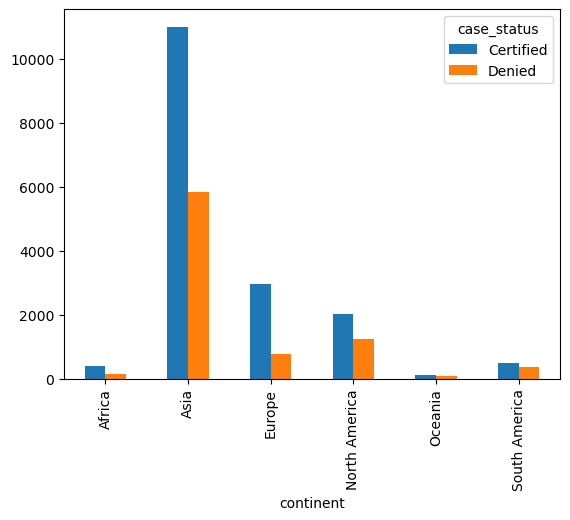

In [53]:
df4.plot(kind='bar')

<Axes: >

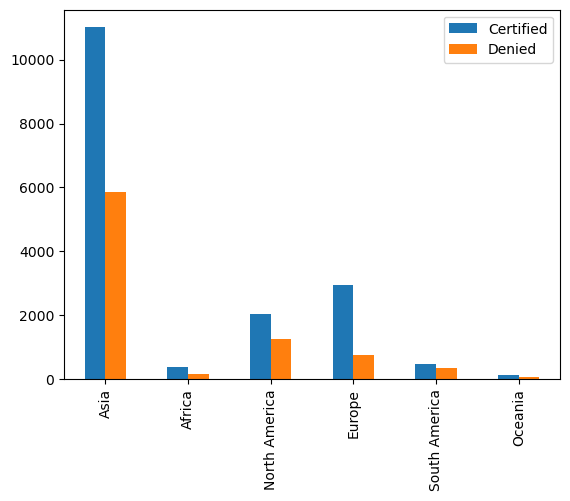

In [55]:
df3.plot(kind='bar')

**Multivariate analysis**
- Education
- continent
- Case status
- we already know from Asia there 11k Accepted visa
- In that I want furthur break down based on education
- here also pd.cross tab
 - first fix your index of any one column out of three column
 - Then keep two column in a list and pass as data column

In [58]:
# Crosstab index col with data cols

idx_column=visa_df['continent']                                     # index col

data_column=[visa_df['education_of_employee'],                      # data column
 visa_df['case_status']]

df5=pd.crosstab(idx_column,data_column)

df5


education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

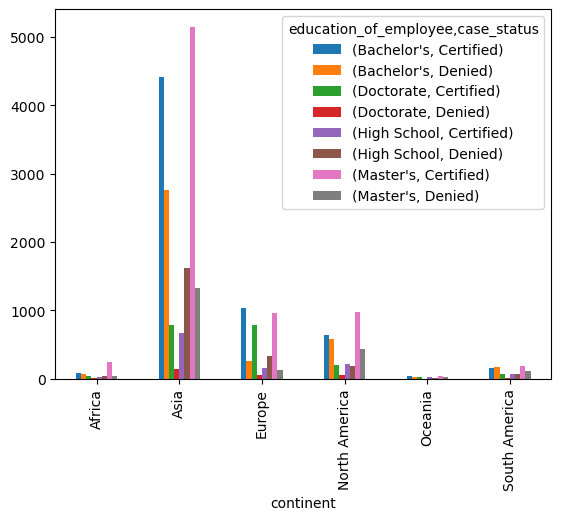

In [60]:
df5.plot(kind='bar')